In [2]:
import numpy as np
from scipy.optimize import minimize
from scipy.io import loadmat
from numpy.linalg import det, inv
from math import sqrt, pi
import scipy.io
import matplotlib.pyplot as plt
import pickle
import sys
from scipy.stats import multivariate_normal

LDA Accuracy = 0.97
QDA Accuracy = 0.96


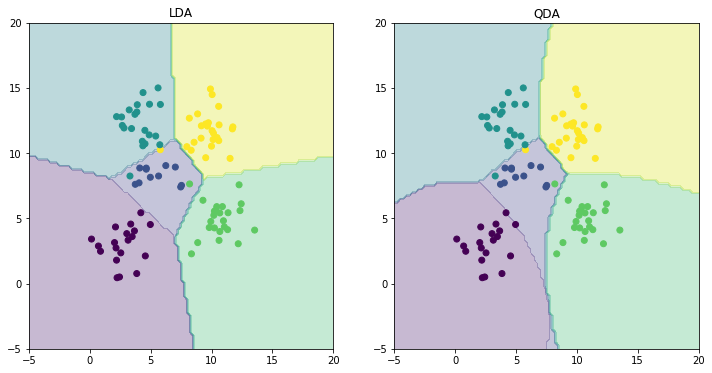

In [27]:
if sys.version_info.major == 2:
    X,y,Xtest,ytest = pickle.load(open('sample.pickle','rb'))
else:
    X,y,Xtest,ytest = pickle.load(open('sample.pickle','rb'),encoding = 'latin1')

def find_covariance(input_mat,mean,pool_cov_base): # function to find covariance for each class
    first=input_mat-mean
    second=first.transpose()
    third=np.matmul(second,first)
    fourth=((input_mat.size)/2)-1
    pool_cov_base=pool_cov_base+fourth
    final=third
    return final,pool_cov_base
def find_mean(input_mat):  # function to find mean for each class
    input_mat=np.array(input_mat)
    rows=(input_mat.size)/2
    input_mat=np.reshape(input_mat,(int(rows),2))
    mean=input_mat.mean(0)
    mean=mean.flatten()
    mean=np.reshape(mean,(1,2))
    return input_mat,mean
def find_pool_covariance(c1,c2,c3,c4,c5,pool_cov_base): # function to find pool variance
    pool_cov=c1+c2+c3+c4+c5
    pool_cov_base=Xtest.size/2
    pool_cov_base=pool_cov_base-5
    pool_cov=pool_cov/pool_cov_base
    return pool_cov
def find_qda_covariance(input_mat,mean,pool_cov_base): # function to find covariance for each class
    first=input_mat-mean
    second=first.transpose()
    third=np.matmul(second,first)
    fourth=((input_mat.size)/2)-1
    pool_cov_base=pool_cov_base+fourth
    final=third/fourth
    return final,pool_cov_base
def ldaLearn(X,y):
    # Inputs
    # X - a N x d matrix with each row corresponding to a training example
    # y - a N x 1 column vector indicating the labels for each training example
    #
    # Outputs
    # means - A d x k matrix containing learnt means for each of the k classes
    # covmat - A single d x d learnt covariance matrix 
    
    # IMPLEMENT THIS METHOD 
    index=0
    mat1=[]
    mat2=[]
    mat3=[]
    mat4=[]
    mat5=[]
    while(index<y.size):
        if y[index] == 1:
            mat1.append(X[index])
        if y[index] == 2:
            mat2.append(X[index])
        if y[index] == 3:
            mat3.append(X[index])
        if y[index] == 4:
            mat4.append(X[index])
        if y[index] == 5:
            mat5.append(X[index])
        index=index+1
    pool_cov_base=0;
    mat1,mean1=find_mean(mat1)
    cov1,pool_cov_base=find_covariance(mat1,mean1,pool_cov_base)
    mat2,mean2=find_mean(mat2)
    cov2,pool_cov_base=find_covariance(mat2,mean2,pool_cov_base)

    mat3,mean3=find_mean(mat3)
    cov3,pool_cov_base=find_covariance(mat3,mean3,pool_cov_base)

    mat4,mean4=find_mean(mat4)
    cov4,pool_cov_base=find_covariance(mat4,mean4,pool_cov_base)

    mat5,mean5=find_mean(mat5)
    cov5,pool_cov_base=find_covariance(mat5,mean5,pool_cov_base)

    means=[]
    means.append(mean1)
    means.append(mean2)
    means.append(mean3)
    means.append(mean4)
    means.append(mean5)
    means=np.array(means)
    means=np.asmatrix(means)
    means=means.transpose()
    total_class=5;
    pool_cov_base=(X.size/2)-total_class;
    covmat=find_pool_covariance(cov1,cov2,cov3,cov4,cov5,pool_cov_base)
    return means,covmat
def qdaLearn(X,y):
    # Inputs
    # X - a N x d matrix with each row corresponding to a training example
    # y - a N x 1 column vector indicating the labels for each training example
    #
    # Outputs
    # means - A d x k matrix containing learnt means for each of the k classes
    # covmats - A list of k d x d learnt covariance matrices for each of the k classes
    
    # IMPLEMENT THIS METHOD
    index=0
    mat1=[]
    mat2=[]
    mat3=[]
    mat4=[]
    mat5=[]
    while(index<y.size):
        if y[index] == 1:
            mat1.append(X[index])
        if y[index] == 2:
            mat2.append(X[index])
        if y[index] == 3:
            mat3.append(X[index])
        if y[index] == 4:
            mat4.append(X[index])
        if y[index] == 5:
            mat5.append(X[index])
        index=index+1
    pool_cov_base=0
    mat1,mean1=find_mean(mat1)
    cov1,pool_cov_base=find_qda_covariance(mat1,mean1,pool_cov_base)

    mat2,mean2=find_mean(mat2)
    cov2,pool_cov_base=find_qda_covariance(mat2,mean2,pool_cov_base)

    mat3,mean3=find_mean(mat3)
    cov3,pool_cov_base=find_qda_covariance(mat3,mean3,pool_cov_base)

    mat4,mean4=find_mean(mat4)
    cov4,pool_cov_base=find_qda_covariance(mat4,mean4,pool_cov_base)

    mat5,mean5=find_mean(mat5)
    cov5,pool_cov_base=find_qda_covariance(mat5,mean5,pool_cov_base)

    means=[]
    means.append(mean1)
    means.append(mean2)
    means.append(mean3)
    means.append(mean4)
    means.append(mean5)
    means=np.array(means)
    means=np.asmatrix(means)
    means=means.transpose()
    covmats=[]
    covmats.append(cov1)
    covmats.append(cov2)
    covmats.append(cov3)
    covmats.append(cov4)
    covmats.append(cov5)
    return means,covmats
def ldaTest(means,covmat,Xtest,ytest):
    # Inputs
    # means, covmat - parameters of the LDA model
    # Xtest - a N x d matrix with each row corresponding to a test example
    # ytest - a N x 1 column vector indicating the labels for each test example
    # Outputs
    # acc - A scalar accuracy value
    # ypred - N x 1 column vector indicating the predicted labels

    # IMPLEMENT THIS METHOD
    means=means.transpose()
    index=0
    index2=0
    pdf=0;
    classifier=0
    total_wrong_labels=0;
    ypred=[]
    while(index<ytest.size):
        x_i=Xtest[index]
        index2=0
        classifier=0
        pdf=0
        while(index2<(means.size)/2):
            class_mean=means[index2]
            class_mean=np.array(class_mean)
            class_mean=class_mean.flatten()
            pdf_i=multivariate_normal.pdf(x_i, class_mean, covmat)    
            if(pdf_i>=pdf):
                pdf=pdf_i
                classifier=index2
            index2=index2+1
        label=classifier+1
        if label != ytest[index]:
            total_wrong_labels = total_wrong_labels+1
        index=index+1
        ypred.append(label)
    acc=(ytest.size-total_wrong_labels)/ytest.size
    ypred=np.array(ypred)
    ypred=np.asmatrix(ypred)
    ypred=ypred.transpose()
    return acc,ypred

def qdaTest(means,covmats,Xtest,ytest):
    # Inputs
    # means, covmats - parameters of the QDA model
    # Xtest - a N x d matrix with each row corresponding to a test example
    # ytest - a N x 1 column vector indicating the labels for each test example
    # Outputs
    # acc - A scalar accuracy value
    # ypred - N x 1 column vector indicating the predicted labels

    # IMPLEMENT THIS METHOD
    means=means.transpose()
    index=0
    index2=0
    pdf=0;
    classifier=0
    total_wrong_labels=0;
    ypred=[]
    while(index<ytest.size):
        x_i=Xtest[index]
        index2=0
        classifier=0
        pdf=0
        while(index2<(means.size)/2):
            class_mean=means[index2]
            class_mean=np.array(class_mean)
            class_mean=class_mean.flatten()
            pdf_i=multivariate_normal.pdf(x_i, class_mean, covmats[index2])    
            if(pdf_i>=pdf):
                pdf=pdf_i
                classifier=index2
            index2=index2+1
        label=classifier+1
        if label != ytest[index]:
            total_wrong_labels = total_wrong_labels+1
        index=index+1
        ypred.append(label)
    acc=(ytest.size-total_wrong_labels)/ytest.size
    ypred=np.array(ypred)
    ypred=np.asmatrix(ypred)
    ypred=ypred.transpose()
    return acc,ypred
# LDA
means,covmat = ldaLearn(X,y)
ldaacc,ldares = ldaTest(means,covmat,Xtest,ytest)
print('LDA Accuracy = '+str(ldaacc))
# QDA
means,covmats = qdaLearn(X,y)
qdaacc,qdares = qdaTest(means,covmats,Xtest,ytest)
print('QDA Accuracy = '+str(qdaacc))
x1 = np.linspace(-5,20,100)
x2 = np.linspace(-5,20,100)
xx1,xx2 = np.meshgrid(x1,x2)
xx = np.zeros((x1.shape[0]*x2.shape[0],2))
xx[:,0] = xx1.ravel()
xx[:,1] = xx2.ravel()

fig = plt.figure(figsize=[12,6])
plt.subplot(1, 2, 1)

zacc,zldares = ldaTest(means,covmat,xx,np.zeros((xx.shape[0],1)))
plt.contourf(x1,x2,zldares.reshape((x1.shape[0],x2.shape[0])),alpha=0.3)
plt.scatter(Xtest[:,0],Xtest[:,1],c=ytest.flatten())
plt.title('LDA')

plt.subplot(1, 2, 2)

zacc,zqdares = qdaTest(means,covmats,xx,np.zeros((xx.shape[0],1)))
plt.contourf(x1,x2,zqdares.reshape((x1.shape[0],x2.shape[0])),alpha=0.3)
plt.scatter(Xtest[:,0],Xtest[:,1],c=ytest.flatten())
plt.title('QDA')
plt.show()

In [16]:
# implementing LDA Learning
if sys.version_info.major == 2:
    X,y,Xtest,ytest = pickle.load(open('sample.pickle','rb'))
else:
    X,y,Xtest,ytest = pickle.load(open('sample.pickle','rb'),encoding = 'latin1')
index=0
mat1=[]
mat2=[]
mat3=[]
mat4=[]
mat5=[]
while(index<y.size):
    if y[index] == 1:
        mat1.append(X[index])
    if y[index] == 2:
        mat2.append(X[index])
    if y[index] == 3:
        mat3.append(X[index])
    if y[index] == 4:
        mat4.append(X[index])
    if y[index] == 5:
        mat5.append(X[index])
    index=index+1
def find_covariance(input_mat,mean,pool_cov_base): # function to find covariance for each class
    first=input_mat-mean
    second=first.transpose()
    third=np.matmul(second,first)
    fourth=((input_mat.size)/2)-1
    pool_cov_base=pool_cov_base+fourth
    final=third
    return final,pool_cov_base
def find_mean(input_mat):  # function to find mean for each class
    input_mat=np.array(input_mat)
    rows=(input_mat.size)/2
    input_mat=np.reshape(input_mat,(int(rows),2))
    mean=input_mat.mean(0)
    mean=mean.flatten()
    mean=np.reshape(mean,(1,2))
    return input_mat,mean
def find_pool_covariance(c1,c2,c3,c4,c5,pool_cov_base): # function to find pool variance
    pool_cov=c1+c2+c3+c4+c5
    pool_cov_base=Xtest.size/2
    pool_cov_base=pool_cov_base-5
    pool_cov=pool_cov/pool_cov_base
    return pool_cov
pool_cov_base=0;
mat1,mean1=find_mean(mat1)
cov1,pool_cov_base=find_covariance(mat1,mean1,pool_cov_base)
mat2,mean2=find_mean(mat2)
cov2,pool_cov_base=find_covariance(mat2,mean2,pool_cov_base)

mat3,mean3=find_mean(mat3)
cov3,pool_cov_base=find_covariance(mat3,mean3,pool_cov_base)

mat4,mean4=find_mean(mat4)
cov4,pool_cov_base=find_covariance(mat4,mean4,pool_cov_base)

mat5,mean5=find_mean(mat5)
cov5,pool_cov_base=find_covariance(mat5,mean5,pool_cov_base)

means=[]
means.append(mean1)
means.append(mean2)
means.append(mean3)
means.append(mean4)
means.append(mean5)
means=np.array(means)
means=np.asmatrix(means)
means=means.transpose()
total_class=5;
pool_cov_base=(X.size/2)-total_class;
covmat=find_pool_covariance(cov1,cov2,cov3,cov4,cov5,pool_cov_base)
#test lda
means=means.transpose()
index=0
index2=0
pdf=0;
classifier=0
total_wrong_labels=0;
ypred=[]
while(index<ytest.size):
    x_i=Xtest[index]
    index2=0
    classifier=0
    pdf=0
    while(index2<(means.size)/2):
        class_mean=means[index2]
        class_mean=np.array(class_mean)
        class_mean=class_mean.flatten()
        pdf_i=multivariate_normal.pdf(x_i, class_mean, covmat)    
        if(pdf_i>=pdf):
            pdf=pdf_i
            classifier=index2
        index2=index2+1
    label=classifier+1
    if label != ytest[index]:
        total_wrong_labels = total_wrong_labels+1
    index=index+1
    ypred.append(label)
accuracy=(ytest.size-total_wrong_labels)/ytest.size
ypred=np.array(ypred)
ypred=np.asmatrix(ypred)
ypred=ypred.transpose()
            
    


In [19]:
# implementing QDA Learning
if sys.version_info.major == 2:
    X,y,Xtest,ytest = pickle.load(open('sample.pickle','rb'))
else:
    X,y,Xtest,ytest = pickle.load(open('sample.pickle','rb'),encoding = 'latin1')
index=0
mat1=[]
mat2=[]
mat3=[]
mat4=[]
mat5=[]
while(index<y.size):
    if y[index] == 1:
        mat1.append(X[index])
    if y[index] == 2:
        mat2.append(X[index])
    if y[index] == 3:
        mat3.append(X[index])
    if y[index] == 4:
        mat4.append(X[index])
    if y[index] == 5:
        mat5.append(X[index])
    index=index+1
def find_covariance(input_mat,mean,pool_cov_base): # function to find covariance for each class
    first=input_mat-mean
    second=first.transpose()
    third=np.matmul(second,first)
    fourth=((input_mat.size)/2)-1
    pool_cov_base=pool_cov_base+fourth
    final=third/fourth
    return final,pool_cov_base
def find_mean(input_mat):  # function to find mean for each class
    input_mat=np.array(input_mat)
    input_mat=input_mat.flatten()
    rows=(input_mat.size)/2
    input_mat=np.reshape(input_mat,(int(rows),2))
    mean=input_mat.mean(0)
    mean=mean.flatten()
    mean=np.reshape(mean,(1,2))
    return input_mat,mean
mat1,mean1=find_mean(mat1)
cov1,pool_cov_base=find_covariance(mat1,mean1,pool_cov_base)

mat2,mean2=find_mean(mat2)
cov2,pool_cov_base=find_covariance(mat2,mean2,pool_cov_base)

mat3,mean3=find_mean(mat3)
cov3,pool_cov_base=find_covariance(mat3,mean3,pool_cov_base)

mat4,mean4=find_mean(mat4)
cov4,pool_cov_base=find_covariance(mat4,mean4,pool_cov_base)

mat5,mean5=find_mean(mat5)
cov5,pool_cov_base=find_covariance(mat5,mean5,pool_cov_base)

means=[]
means.append(mean1)
means.append(mean2)
means.append(mean3)
means.append(mean4)
means.append(mean5)
means=np.array(means)
means=np.asmatrix(means)
means=means.transpose()
covmats=[]
covmats.append(cov1)
covmats.append(cov2)
covmats.append(cov3)
covmats.append(cov4)
covmats.append(cov5)
print(covmats)
#test qda
means=means.transpose()
index=0
index2=0
pdf=0;
classifier=0
total_wrong_labels=0;
ypred=[]
while(index<ytest.size):
    x_i=Xtest[index]
    index2=0
    classifier=0
    pdf=0
    while(index2<(means.size)/2):
        class_mean=means[index2]
        class_mean=np.array(class_mean)
        class_mean=class_mean.flatten()
        pdf_i=multivariate_normal.pdf(x_i, class_mean, covmats[index2])    
        if(pdf_i>=pdf):
            pdf=pdf_i
            classifier=index2
        index2=index2+1
    label=classifier+1
    if label != ytest[index]:
        total_wrong_labels = total_wrong_labels+1
    index=index+1
    ypred.append(label)
acc=(ytest.size-total_wrong_labels)/ytest.size
ypred=np.array(ypred)
ypred=np.asmatrix(ypred)
ypred=ypred.transpose()
            

[array([[ 1.09113961, -0.1584732 ],
       [-0.1584732 ,  1.66024746]]), array([[ 1.47887252,  0.0828507 ],
       [ 0.0828507 ,  3.37775876]]), array([[ 2.25283733, -0.08148952],
       [-0.08148952,  1.93070946]]), array([[ 1.7741846 , -0.40489726],
       [-0.40489726,  2.07372154]]), array([[ 2.52050924, -0.05183432],
       [-0.05183432,  1.67571127]])]


In [28]:
# implementing least squares method to estimate w
if sys.version_info.major == 2:
    X,y,Xtest,ytest = pickle.load(open('diabetes.pickle','rb'))
else:
    X,y,Xtest,ytest = pickle.load(open('diabetes.pickle','rb'),encoding = 'latin1')

X_i = np.concatenate((np.ones((X.shape[0],1)), X), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)
x=X
x_t = x.transpose()
first_step = np.matmul(x_t,x) # multiplying x transpose and x
second_step = inv(first_step) # taking inverse of first step
third_step = np.matmul(second_step,x_t) # multiplying second step and x transpose
final_step = np.matmul(third_step,y) # multiplying third step and y(output of training dataset)
w = final_step
#print(w)

In [33]:
# using estimated w to predict 
# x_test = np.array(Xtest) # converting Xtest to array to be sure
# y_test = np.array(ytest) # converting ytest to array to be sure
X_i = np.concatenate((np.ones((X.shape[0],1)), X), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)
def find_mse(input_var,y_var,w_est):
    N=y_var.size
    first=np.matmul(input_var,w_est)
    second=np.subtract(y_var,first)
    third=second.transpose()
    fourth=np.matmul(third,second)
    mse=fourth/N
    return mse    
mse= find_mse(X,y,w)
print(mse)

[[ 19099.44684457]]
